<a href="https://colab.research.google.com/github/Parvez13/TensorFlow-Developer-Certification/blob/master/nlp_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. Introduction to NLP (Natural Language Processing) in TensorFlow Exercises

### 1. Rebuild , compile and train `model_1`, `model_2` and `model_5` using the `Keras Sequential API` instead of the Functional API

In [1]:
# import tensorflow
import tensorflow as tf

# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Get the dataset
!wget !wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Extract the zip file
import zipfile

zip_ref = zipfile.ZipFile("nlp_getting_started.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-15 05:00:02--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2021-08-15 05:00:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-08-15 05:00:02 (134 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]

FINISHED --2021-08-15 05:00:02--
Total wall clock time: 0.2s
Downloaded: 1 files, 593K in 0.004s (134 MB/s)


In [3]:
# Check train, test and sample_submission file

# train csv
print("Train csv.....")
train_df = pd.read_csv("train.csv")
print(train_df.head())
print("-----\n")
print("Test csv......")
test_df = pd.read_csv("test.csv")
print(test_df.head())
print("-----\n")
print("Sample Submission.....")
sample_submission = pd.read_csv("sample_submission.csv")
print(sample_submission.head())
print("-----\n")

Train csv.....
   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]
-----

Test csv......
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
-----

Sample Submission.....
   id

Distribution....
0    4342
1    3271
Name: target, dtype: int64
----

Visualize the distribution


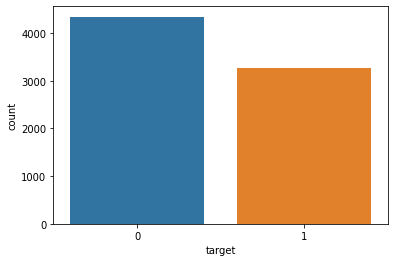

In [4]:
# Check the value_counts
print("Distribution....")
print(train_df['target'].value_counts())
print("----\n")
# import seaborn
import seaborn as sns
print("Visualize the distribution")
sns.countplot(x='target', data=train_df);

In [5]:
# Let's shuffle the data
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

# Check length
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6090, 6090, 1523, 1523)

In [7]:
# Check the samples
train_sentences[:10], train_labels[:10]

(array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
        "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
        'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
        "#Greece's tax revenues collapse as debt crisis continues via @guardian #bailout http://t.co/cJvbQXw83s ^mp",
        'Be not afraid of sudden fear neither of the desolation of the wicked when it cometh. For the Lord shall be thy... http://t.co/bP597YDs2b',
        'Storm batters Auckland and Northland: A violent overnight storm has battered Auckland and Northland uprooting... http://t.co/enrPGRgtTs',
        "Benzema increasingly looks to be a casualty of Benitez's new look squad. Arsenal bound? 50-50 chance I think",
        'Acquire your postexistence straight a elevation in addition

In [8]:
# Average tokens
round(sum([len(i.split())for i in train_sentences])/len(train_sentences))

15

In [9]:
# Converting Text Into Numbers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 10000
max_sequence_length = 15

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_mode='int',
                                    output_sequence_length=max_sequence_length)


In [10]:
# Adapt the train_sentences to tokenization
text_vectorizer.adapt(train_sentences)

In [11]:
# sample
sample_sentences = "Let me love you! It's been a hell of a ride, driving the edge of a knife."
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 176,   32,  110,   12,   37,   61,    3,  566,    6,    3, 2532,
        1049,    2,    1,    6]])>

In [12]:
# Check the train sentneces
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\n Vectorized Version:")
text_vectorizer([random_sentence])

Original text:
 Party for Bestival crash victim Michael Molloy on what would have been his 21st http://t.co/BIkR8zzbhA

 Vectorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1157,   10,    1,   86, 1231, 1272, 9905,   11,   54,   80,   24,
          61,   76,    1,    1]])>

In [13]:
# Get the unique words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [14]:
# Turn the numbers into vectors 'Word2Vec'
from tensorflow.keras import layers

embeddings = layers.Embedding(input_dim=max_tokens,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_sequence_length)

In [15]:
# Get a  random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
       \n\nEmbedded version: ")
# Embed the random sentence (turn it into dense vectors of fixe size)
sample_embed = embeddings(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Ford : Other Military VERY NICE M151A1 MUTT with matching M416 Trailer - Full read by eBay http://t.co/9rrYaYlgyY http://t.co/Nm83jOhLUu       

Embedded version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01886543, -0.03940039,  0.00435781, ...,  0.03607829,
         -0.02342892, -0.00440959],
        [ 0.04684729, -0.04736873,  0.03702812, ...,  0.04104495,
         -0.01132289,  0.03959056],
        [-0.03081011,  0.0354659 , -0.04305562, ..., -0.02965742,
          0.04114287,  0.04627284],
        ...,
        [ 0.02849576,  0.0433973 ,  0.01605649, ...,  0.0067045 ,
         -0.04361096,  0.03455207],
        [ 0.03336919, -0.04478925,  0.008271  , ..., -0.02931347,
         -0.00490816, -0.00135543],
        [ 0.02936027, -0.03590301, -0.03549463, ..., -0.00256609,
          0.00109116,  0.00032694]]], dtype=float32)>

In [16]:
# Model 1 Dense layer

model_1 = tf.keras.Sequential([
      layers.Input(shape=(1,), dtype='string'),
      text_vectorizer,
      embeddings,
      layers.GlobalAveragePooling1D(),
      layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
191/191 [==============================] - 6s 15ms/step - loss: 0.6219 - accuracy: 0.6882 - val_loss: 0.5476 - val_accuracy: 0.7485
Epoch 2/5
191/191 [==============================] - 3s 14ms/step - loss: 0.4545 - accuracy: 0.8138 - val_loss: 0.4778 - val_accuracy: 0.7794
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3536 - accuracy: 0.8575 - val_loss: 0.4594 - val_accuracy: 0.7925
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2867 - accuracy: 0.8885 - val_loss: 0.4614 - val_accuracy: 0.7853
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2373 - accuracy: 0.9128 - val_loss: 0.4733 - val_accuracy: 0.7879


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
# plot the loss_curves
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss=history.history['val_loss']

  epochs = range(len(history.history['loss']))

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.legend()
  plt.title("Loss")
  plt.xlabel("Epochs")

  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.legend()
  plt.title("Accuracy")
  plt.xlabel("Epochs")

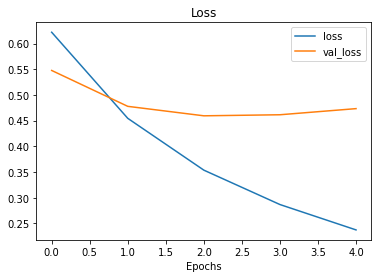

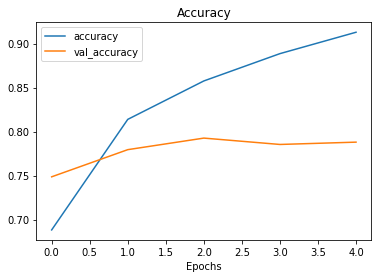

In [19]:
plot_loss_curves(model_1_history)

In [20]:
# Model 2
model_2 = tf.keras.Sequential([
      layers.Input(shape=(1,), dtype='string', name='input_layer'),
      text_vectorizer,
      embeddings,
      layers.LSTM(64),
      layers.Dense(1, activation='sigmoid', name='output_layer')
])


In [21]:
# compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_2_history  = model_2.fit(train_sentences, train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels))

Epoch 1/5
191/191 [==============================] - 9s 19ms/step - loss: 0.2219 - accuracy: 0.9187 - val_loss: 0.5397 - val_accuracy: 0.7754
Epoch 2/5
191/191 [==============================] - 3s 16ms/step - loss: 0.1459 - accuracy: 0.9466 - val_loss: 0.6895 - val_accuracy: 0.7853
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.1155 - accuracy: 0.9588 - val_loss: 0.7167 - val_accuracy: 0.7695
Epoch 4/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0932 - accuracy: 0.9637 - val_loss: 0.9203 - val_accuracy: 0.7689
Epoch 5/5
191/191 [==============================] - 3s 16ms/step - loss: 0.0752 - accuracy: 0.9688 - val_loss: 0.9779 - val_accuracy: 0.7748


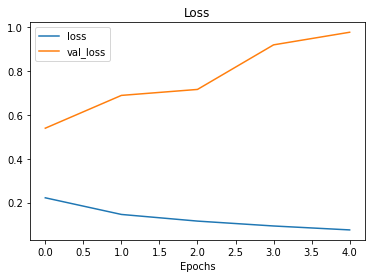

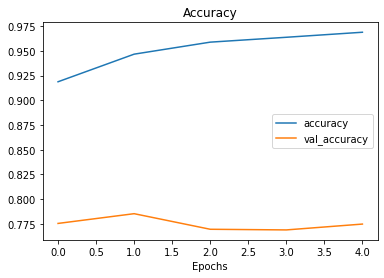

In [22]:
plot_loss_curves(model_2_history)

In [23]:
# model 5

model_5 = tf.keras.Sequential([
        layers.Input(shape=(1,), dtype='string', name='input_layer'),
        text_vectorizer,
        embeddings,
        layers.Conv1D(64, 5, strides=2, padding='valid', activation='relu', name='Conv1D'),
        layers.GlobalAveragePooling1D(name='global_average_pooling_1d'),
        layers.Dense(1, activation='sigmoid', name='output_layer')
])

# summary
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
Conv1D (Conv1D)              (None, 6, 64)             41024     
_________________________________________________________________
global_average_pooling_1d (G (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# fit the model
model_5_history = model_5.fit(train_sentences, train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels))

Epoch 1/5
191/191 [==============================] - 29s 16ms/step - loss: 0.1732 - accuracy: 0.9476 - val_loss: 0.7275 - val_accuracy: 0.7735
Epoch 2/5
191/191 [==============================] - 3s 16ms/step - loss: 0.1007 - accuracy: 0.9614 - val_loss: 0.8387 - val_accuracy: 0.7663
Epoch 3/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0810 - accuracy: 0.9677 - val_loss: 0.9529 - val_accuracy: 0.7708
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0697 - accuracy: 0.9732 - val_loss: 1.0193 - val_accuracy: 0.7649
Epoch 5/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0587 - accuracy: 0.9759 - val_loss: 1.1151 - val_accuracy: 0.7617


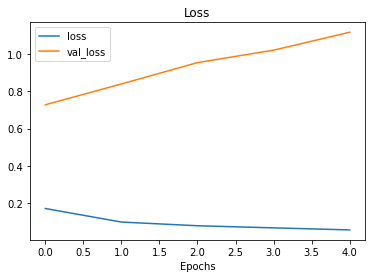

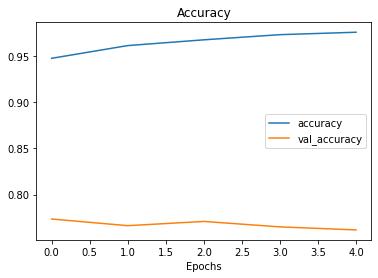

In [25]:
plot_loss_curves(model_5_history)

### Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the trianing data?

In [26]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split

train_sentences_10_percent = train_sentences[:train_10_percent_split]
len(train_sentences_10_percent)

train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

609

In [27]:
# Building a base line model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

baseline_model = Pipeline([
                        ("tfidf", TfidfVectorizer()),
                        ("clf", MultinomialNB())
])

# Fit the model
baseline_model.fit(train_sentences_10_percent, train_labels_10_percent)

# Evaluating our baseline model
baseline_score = baseline_model.score(val_sentences, val_labels)
baseline_score

0.7603414313854235

**Universal Sentences Encoder** model performed best when compared to **baseline_10_percent_model**

### 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting `training=True` when instantiating it as a Keras layer

In [28]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model


In [29]:
model_6 = tf.keras.Sequential([
      sentence_encoder_layer,
      layers.Dense(128, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# fit the model
model_6_history = model_6.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
20/20 [==============================] - 8s 191ms/step - loss: 0.6069 - accuracy: 0.6946 - val_loss: 0.5230 - val_accuracy: 0.7551
Epoch 2/5
20/20 [==============================] - 3s 170ms/step - loss: 0.3756 - accuracy: 0.8555 - val_loss: 0.4887 - val_accuracy: 0.7807
Epoch 3/5
20/20 [==============================] - 3s 170ms/step - loss: 0.1647 - accuracy: 0.9573 - val_loss: 0.5492 - val_accuracy: 0.7866
Epoch 4/5
20/20 [==============================] - 3s 169ms/step - loss: 0.0485 - accuracy: 0.9918 - val_loss: 0.7320 - val_accuracy: 0.7525
Epoch 5/5
20/20 [==============================] - 3s 170ms/step - loss: 0.0208 - accuracy: 0.9967 - val_loss: 0.7675 - val_accuracy: 0.7768


### Retrain the best model you've got so far on the whole training set (no validation split).

Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [30]:
train_sentences = train_df_shuffled['text'].to_numpy()
train_labels = train_df_shuffled['target'].to_numpy()

len(train_sentences), len(train_labels)

(7613, 7613)

In [31]:
# Create model using the sequential api
model = tf.keras.Sequential([
        sentence_encoder_layer,
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
model_history = model.fit(train_sentences,
                          train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 40s 154ms/step - loss: 0.4152 - accuracy: 0.8232 - val_loss: 0.2548 - val_accuracy: 0.9087
Epoch 2/5
238/238 [==============================] - 36s 152ms/step - loss: 0.2057 - accuracy: 0.9254 - val_loss: 0.1045 - val_accuracy: 0.9744
Epoch 3/5
238/238 [==============================] - 36s 152ms/step - loss: 0.0736 - accuracy: 0.9752 - val_loss: 0.0312 - val_accuracy: 0.9888
Epoch 4/5
238/238 [==============================] - 36s 151ms/step - loss: 0.0398 - accuracy: 0.9842 - val_loss: 0.0224 - val_accuracy: 0.9915
Epoch 5/5
238/238 [==============================] - 36s 152ms/step - loss: 0.0261 - accuracy: 0.9899 - val_loss: 0.0135 - val_accuracy: 0.9954


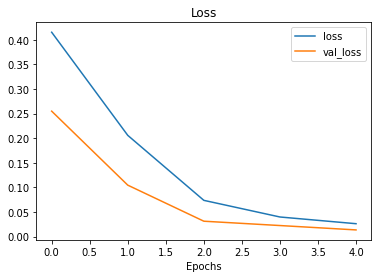

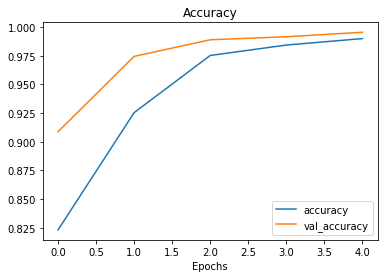

In [32]:
plot_loss_curves(model_history)

In [36]:
# make prediction on validation data
model_pred_probs = model.predict(val_sentences)
model_pred_probs

model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds = tf.cast(model_preds, dtype=tf.int32)
model_preds

<tf.Tensor: shape=(1523,), dtype=int32, numpy=array([0, 1, 1, ..., 0, 0, 1], dtype=int32)>

In [37]:
# Make prediction on full test data
model_pred_probs = model.predict(test_df['text'])
model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds= tf.cast(model_preds, dtype=tf.int32)
model_preds

<tf.Tensor: shape=(3263,), dtype=int32, numpy=array([1, 1, 1, ..., 1, 1, 1], dtype=int32)>

In [40]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [41]:
submission = pd.DataFrame({'id':test_df['id'].values,
                           'target':(model_preds.numpy())})

In [50]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [51]:
model_preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int32)>

In [53]:
submission.to_csv("preds_submission.csv", index=False)

### 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

* model_5 -> Conv1D Model
* model_2 -> LSTM Model
* model -> TFHub Model

Now let's get the predictions for each model and perform majority model

In [54]:
# Getting the model predictions

def give_preds(model, test_sentences):

  pred_probs = model.predict(test_sentences)
  preds = tf.squeeze(tf.round(pred_probs))
  preds = tf.cast(preds , dtype = tf.int32)

  return preds

In [56]:
test_sentences = test_df['text'].to_numpy()

# Checking the shapes 
test_sentences.shape

(3263,)

In [57]:
# Getting the predictions for our 3 models 
model_preds = give_preds(model , test_sentences)
model_2_preds = give_preds(model_2 ,test_sentences)
model_5_preds = give_preds(model_5 , test_sentences)

# Checking the shapes of our prediction 
model_preds.shape , model_2_preds.shape , model_5_preds.shape

(TensorShape([3263]), TensorShape([3263]), TensorShape([3263]))

In [58]:

# Creating a dataframe of our predictions 

preds_df = pd.DataFrame({'USE_model': model_preds , 
              'LSTM_model': model_2_preds , 
              'Conv1D_model': model_5_preds})
preds_df.head()

,USE_model,LSTM_model,Conv1D_model
0,1,1,1
1,1,0,0
2,1,1,1
3,1,1,1
4,1,1,1


In [59]:
# Majority voted predictions of our model
preds_df['majority_vote_preds'] = preds_df.mode(axis = 1)
preds_df.head()

,USE_model,LSTM_model,Conv1D_model,majority_vote_preds
0,1,1,1,1
1,1,0,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### 6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.
Our best performing model is the model from the tensorflow hub.

In [60]:
# Funtion taken from the course 
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [61]:
# Predictions on the validation sentences 
val_preds = give_preds(model , val_sentences)

# Creating a array of our class names 
class_names = ['not_a_disaster' , 'disaster']

# Checking the preds and true labels shape
val_preds.shape , val_labels.shape

(TensorShape([1523]), (1523,))

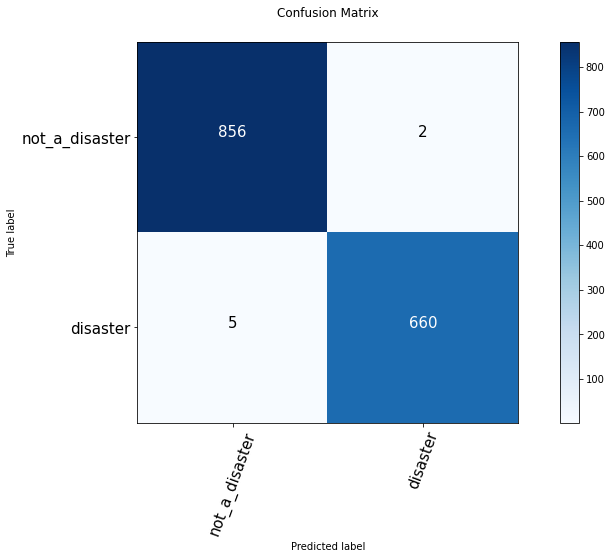

In [62]:

# Plotting the confusion matrix 
make_confusion_matrix(y_true= val_labels , 
                      y_pred = val_preds , 
                      classes = class_names , 
                      figsize= (15 , 7), 
                      norm = False , 
                      savefig = True , 
                      text_size = 15)